In [1]:
%pwd

'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Project'

### EE 257 Project Code

Table of Contents
    
    Part a) Preliminary Setup
    Part b) Dataset Description
    Part c) Dataset Visualization
    Part d) Dataset Cleaning
    Part e) Related Work
    Part f) Feature Extraction
    Part g) Model Development
    Part h) Fine-Tune Models and Feature Set
    Part e) Performance

### Part a) Preliminary Setup
    1. Import Necessary Libraries
    2. Import the Dataset

In [76]:
#1. Import Necessary Liobraries
import pandas as pd 
import numpy as np 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

#Classification Libraries
import sklearn.linear_model as skl_lm 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier

#Subset Selection Libraries
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 


# Libraries for the Confusion Matrix, Classification report and the precision score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


# Stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random
import array


print('DONE INITIALIZATION')

DONE INITIALIZATION


In [3]:
#2. Import the Dataset
    #Note: There are two versions of the dataset, one with spaces and one without. 
    #      This code will use the dataset without spaces. 
#----------------------------------------------------------------------------------
#This version has spaces in the labels:
dataset = pd.read_csv("data.csv", delimiter = ";")
#This version has no spaces in the labels:
dataset_ = pd.read_csv("data_no_spaces.csv", delimiter = ";")

### Part b) Dataset Description

    1. General Info
    2. Describing the Dataset
    3. Head of the Dataset
    4. Creating General Dataframes (For later use)

In [4]:
# 1. General Info
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
#2. Describing the dataset
dataset_.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
#3. Head of the Dataset (Used to see a quick glimpse of the dataset)
dataset_.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# 4. Creating General Dataframes
# These dataframes are used for different aspects of the code.

#General Dataframe = No spaces
df_ = pd.DataFrame(dataset_)

#--------------------------------------------------------------------
#All "features" variable creation
features_ = df_[['Marital_status', # Double brackets  
            'Application_mode',                                  
            'Application_order',                                 
            'Course',                                            
            'Daytime_evening_attendance',                        
            'Previous_qualification',                            
            'Previous_qualification_grade',                      
            'Nacionality',                                       
            'Mothers_qualification',                             
            'Fathers_qualification',                             
            'Mothers_occupation',                                
            'Fathers_occupation',                                
            'Admission_grade',                                   
            'Displaced',                                         
            'Educational_special_needs',                         
            'Debtor',                                            
            'Tuition_fees_up_to_date',                           
            'Gender',                                            
            'Scholarship_holder',                                
            'Age_at_enrollment',                                 
            'International',                                     
            'Curricular_units_1st_sem_credited',                 
            'Curricular_unit_1st_sem_enrolled',                  
            'Curricular_units_1st_sem_evaluations',              
            'Curricular_units_1st_sem_approved',                 
            'Curricular_units_1st_sem_grade',                    
            'Curricular_units_1st_sem_without_evaluations',      
            'Curricular_units_2nd_sem_credited',                 
            'Curricular_units_2nd_sem_enrolled',                 
            'Curricular_units_2nd_sem_evaluations',              
            'Curricular_units_2nd_sem_approved',                 
            'Curricular_units_2nd_sem_grade',                    
            'Curricular_units_2nd_sem_without_evaluations',      
            'Unemployment_rate',                                 
            'Inflation_rate',                                    
            'GDP'                                                                                         
            ]]
#---------------------------------------------------------------------------#
#Specific Dataframes for Organization Purposes
#Demographic_data Category
Demographic_data = df_[['Marital_status',                      
                'Nacionality',                                                                       
                'Displaced',                                                     
                'Gender',                          
                'Age_at_enrollment',                                 
                'International'                                                                                                                          
            ]]
#Socioeconomic_data Category
Socioeconomic_data = df_[['Mothers_qualification',                             
                'Fathers_qualification',                             
                'Mothers_occupation',                                
                'Fathers_occupation',                       
                'Educational_special_needs',                         
                'Debtor',                                            
                'Tuition_fees_up_to_date',                                     
                'Scholarship_holder'                                                                                                                        
            ]]
#Macroeconomic_data Category
Macroeconomic_data = df_[['Unemployment_rate',                                 
            'Inflation_rate',                                    
            'GDP'
             ]]
#Academic_data_at_enrollment Category
Academic_data_at_enrollment = df_[[   
            'Application_mode',                                  
            'Application_order',                                 
            'Course',                                            
            'Daytime_evening_attendance',                        
            'Previous_qualification',                            
            'Previous_qualification_grade'                    
            ]]
#Academic_data_at_the_end_of_1st_sem Category
Academic_data_at_the_end_of_1st_sem = df_[[ 
            'Curricular_units_1st_sem_credited',                 
            'Curricular_unit_1st_sem_enrolled',                  
            'Curricular_units_1st_sem_evaluations',              
            'Curricular_units_1st_sem_approved',                 
            'Curricular_units_1st_sem_grade',                    
            'Curricular_units_1st_sem_without_evaluations'
            ]]  
#Academic_data_at_the_end_of_2nd_sem Category
Academic_data_at_the_end_of_2nd_sem = df_[[ 
            'Curricular_units_2nd_sem_credited',                 
            'Curricular_units_2nd_sem_enrolled',                 
            'Curricular_units_2nd_sem_evaluations',              
            'Curricular_units_2nd_sem_approved',                 
            'Curricular_units_2nd_sem_grade',                    
            'Curricular_units_2nd_sem_without_evaluations'
]]
#---------------------------------------------------------------------------#
#Creation of the Target Variable
Target = df_[['Target']]
#---------------------------------------------------------------------------#

### Part c) Data Visualizations

    1. Histograms for Specific Categories (Previously created)
    2. Box Plots
    3. Simple Scatter Plots (Visualization Purposes)
    4. Analysis of the Target
    5. Classification Visualization
    6. Correlation Matrix

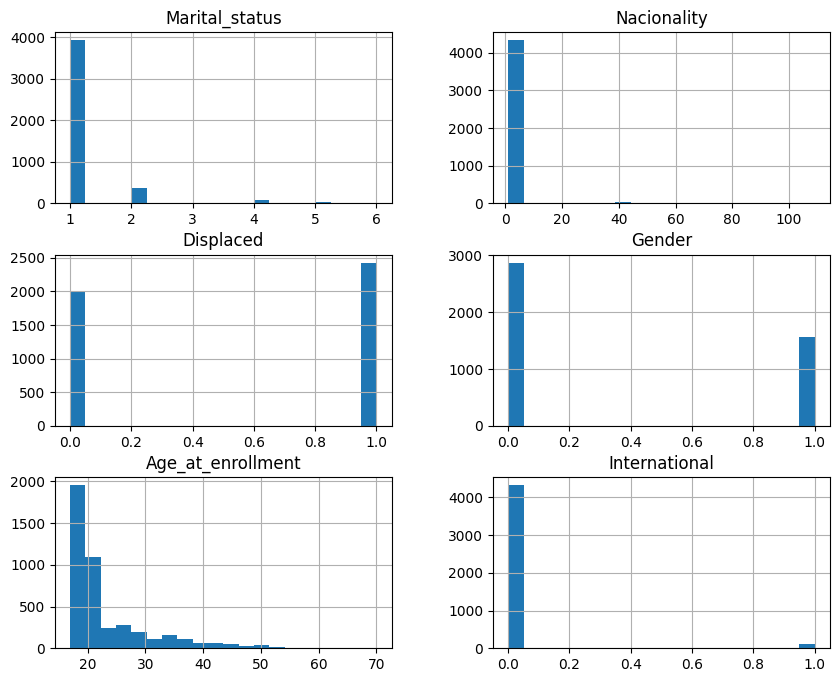

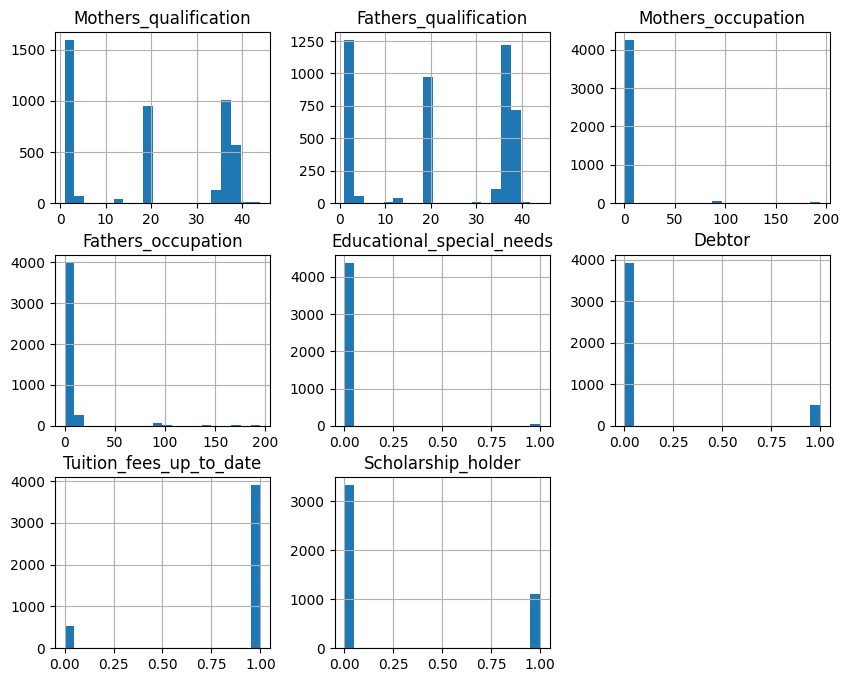

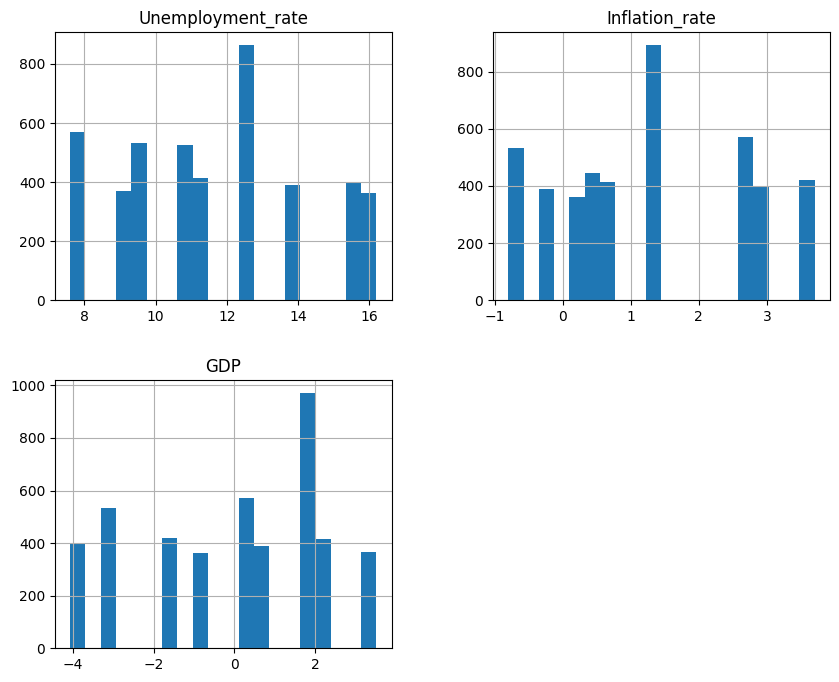

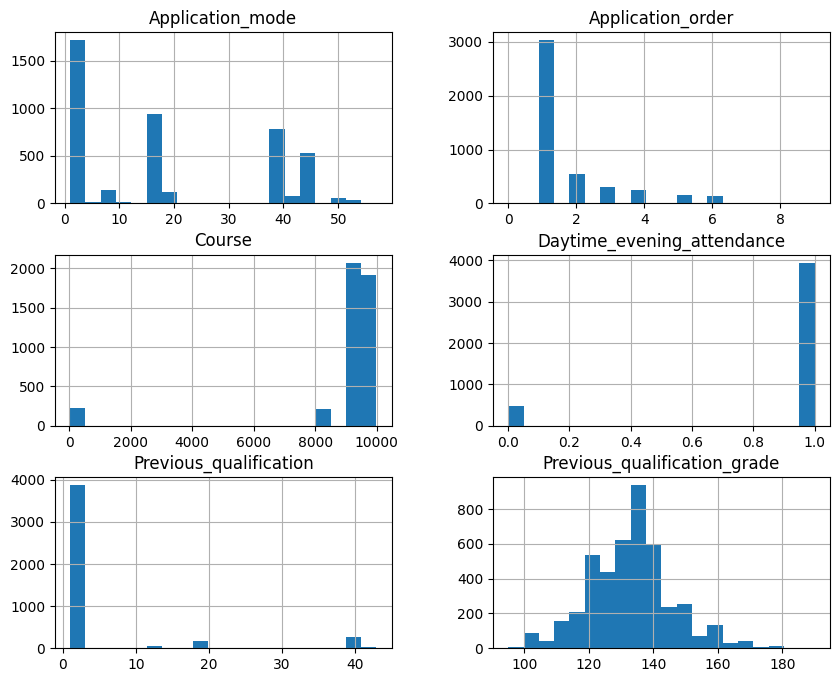

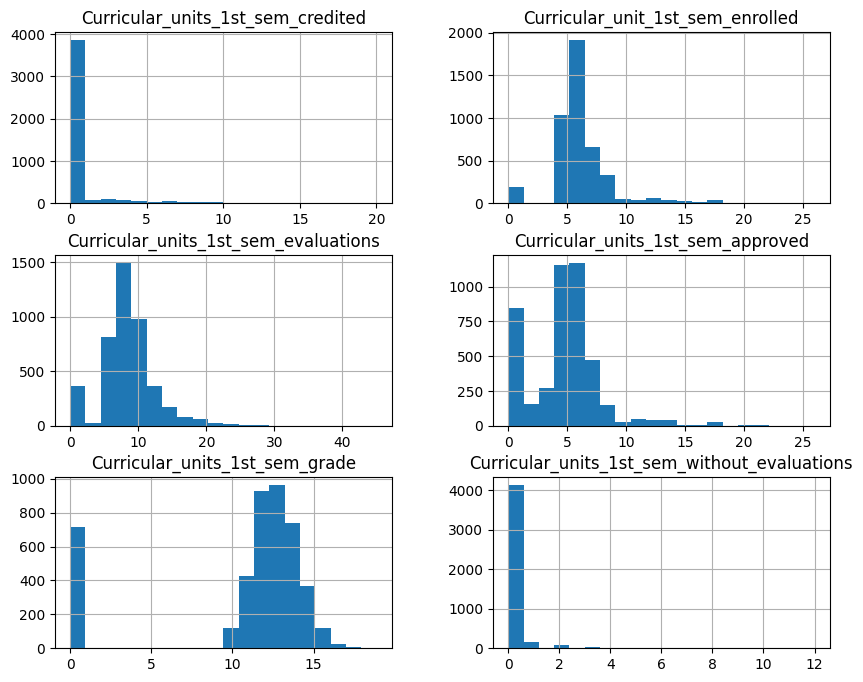

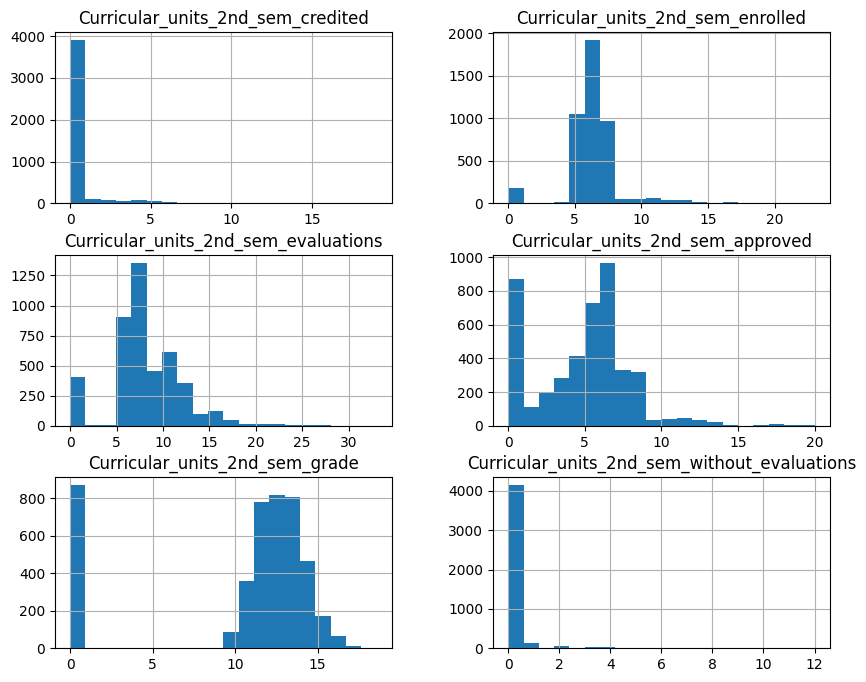

In [8]:
# 1. Histograms
#---------------------------------------------------------------------------#
Demographic_data.hist(bins = 20, figsize = (10,8))
plt.show()
#---------------------------------------------------------------------------#
Socioeconomic_data.hist(bins = 20, figsize = (10,8))
plt.show()
#---------------------------------------------------------------------------#
Macroeconomic_data.hist(bins = 20, figsize = (10,8))
plt.show()
#---------------------------------------------------------------------------#
Academic_data_at_enrollment.hist(bins = 20, figsize = (10,8))
plt.show()
#---------------------------------------------------------------------------#
Academic_data_at_the_end_of_1st_sem.hist(bins = 20, figsize = (10,8))
plt.show()
#---------------------------------------------------------------------------#
Academic_data_at_the_end_of_2nd_sem.hist(bins = 20, figsize = (10,8))
plt.show()

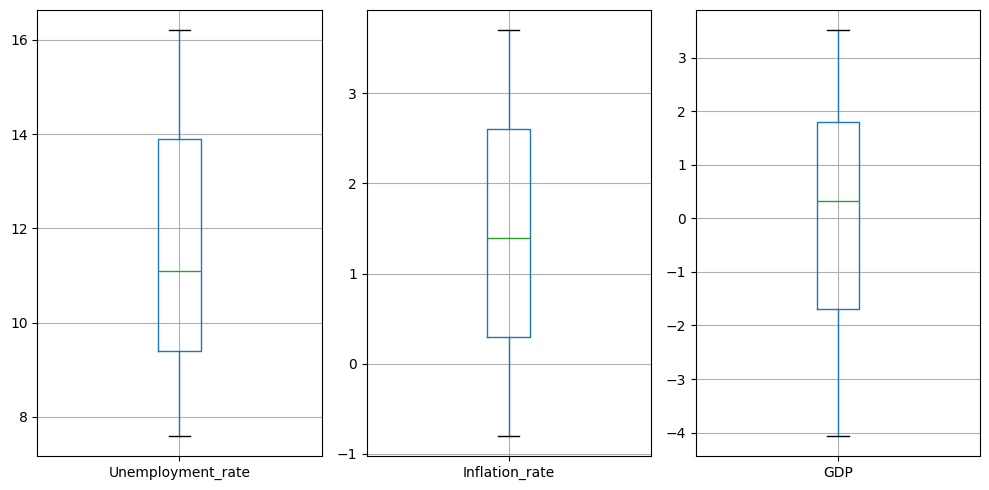

In [9]:
# 2. Box Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Create boxplots for each column
for i, column in enumerate(Macroeconomic_data.columns):
    Macroeconomic_data.boxplot(column, ax=axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

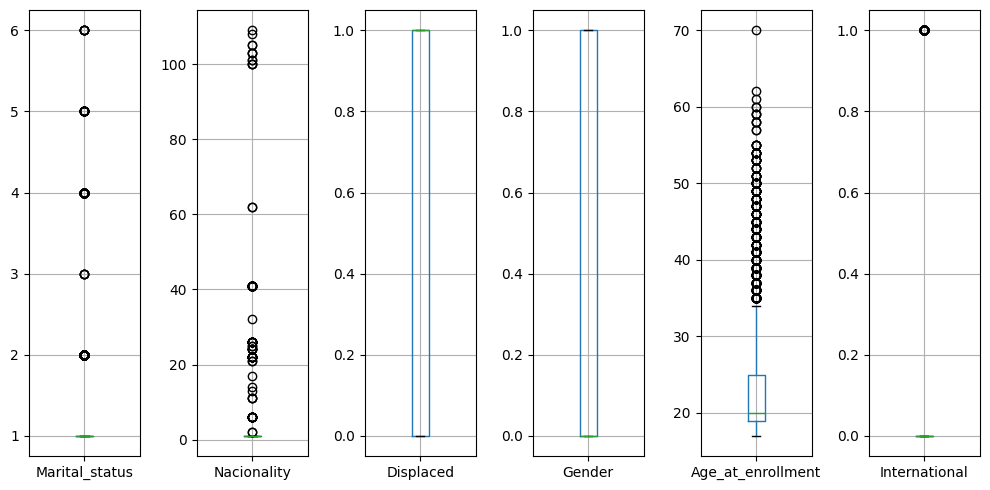

In [10]:
# 2. Box Plots (Cont)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5))

# Create boxplots for each column
for i, column in enumerate(Demographic_data.columns):
    Demographic_data.boxplot(column, ax=axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='Previous_qualification_grade', ylabel='Admission_grade'>

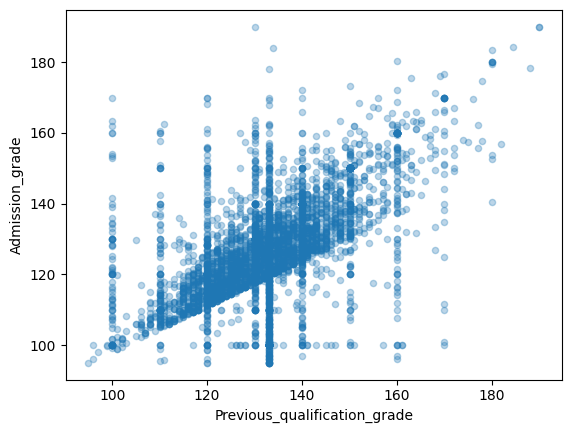

In [11]:
#3. Simple Scatter Plot Visualization
    #Possible Graphs: 36 choose 2 = 630 Possible Graphs
df_.plot(kind = "scatter", x= "Previous_qualification_grade", y = "Admission_grade", alpha=0.3)

In [12]:
# 4. Analysis of the Target Output
Target.describe()

,Target
count,4424
unique,3
top,Graduate
freq,2209


In [13]:
# 4. Analysis of the Target Output (Count)

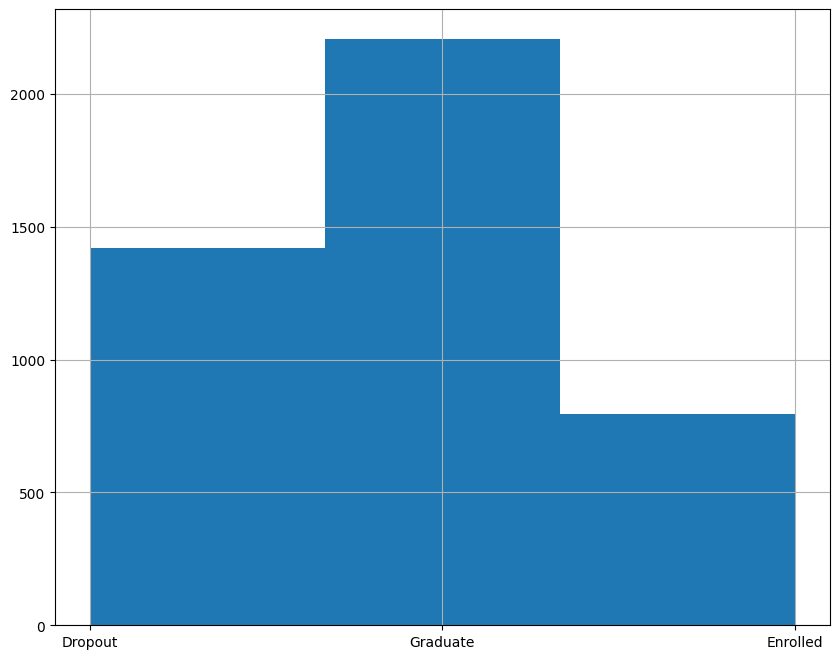

In [14]:
df_['Target'].hist(bins = 3, figsize = (10,8))
plt.show()

In [15]:
# 5. Simple Classification Visualization
#Enumerate the Target:
    #Dropout  = 0
    #Graduate = 1
    #Enrolled = 2
#This code allows
df_['Target2'] = df_['Target'].factorize()[0]
#df_ : Dataset now has an extra field that represents the target output numbers.

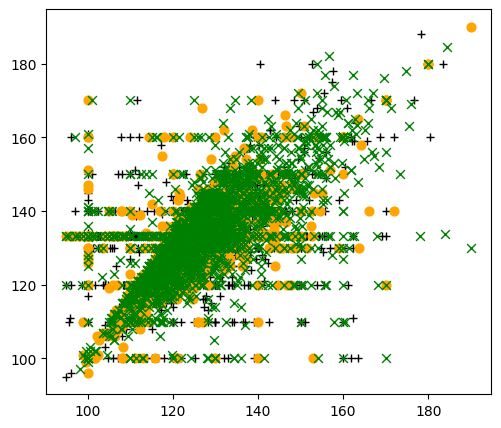

In [16]:
# 5. Simple Classification Visualization (Cont.)
#Create the grid
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,:-2])
ax3 = plt.subplot(gs[0,:-2])

# Take a fraction of the samples where target value is '0'
df_dropout = df_[df_.Target2 == 0]

# Take all samples  where target value is '1'
df_graduate = df_[df_.Target2 == 1]

# Take all samples  where target value is '2'
df_enrolled = df_[df_.Target2 == 2]

#Concat function used instead of append
df_all = pd.concat([df_dropout, df_graduate, df_enrolled])

#Assign the datapoints to the previously created scatter plots
ax1.scatter(df_all[df_all.Target == 'Dropout'].Admission_grade, df_all[df_all.Target == 'Dropout'].Previous_qualification_grade, s=40, c='black', marker='+',
            linewidths=1)

ax1.scatter(df_all[df_all.Target == 'Enrolled'].Admission_grade, df_all[df_all.Target == 'Enrolled'].Previous_qualification_grade, s=40, c='orange', marker='o',
            linewidths=1)

ax1.scatter(df_all[df_all.Target == 'Graduate'].Admission_grade, df_all[df_all.Target == 'Graduate'].Previous_qualification_grade, s=40, c='green', marker='x',
            linewidths=1)

In [17]:
# 6. Simple Correlation Matrix and Output
corr_matrix_save = dataset_.corr(numeric_only = True, min_periods = 36)
corr_matrix_save

#Assert File Path to store full correlation matrix
excel_file_path = 'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Project\\corr_matrix.xlsx'
excel_writer = pd.ExcelWriter(excel_file_path, engine = None)
corr_matrix_save.to_excel(excel_writer, sheet_name='Corr_matrix')
#CLose the excel writer 
excel_writer.close()


<Axes: >

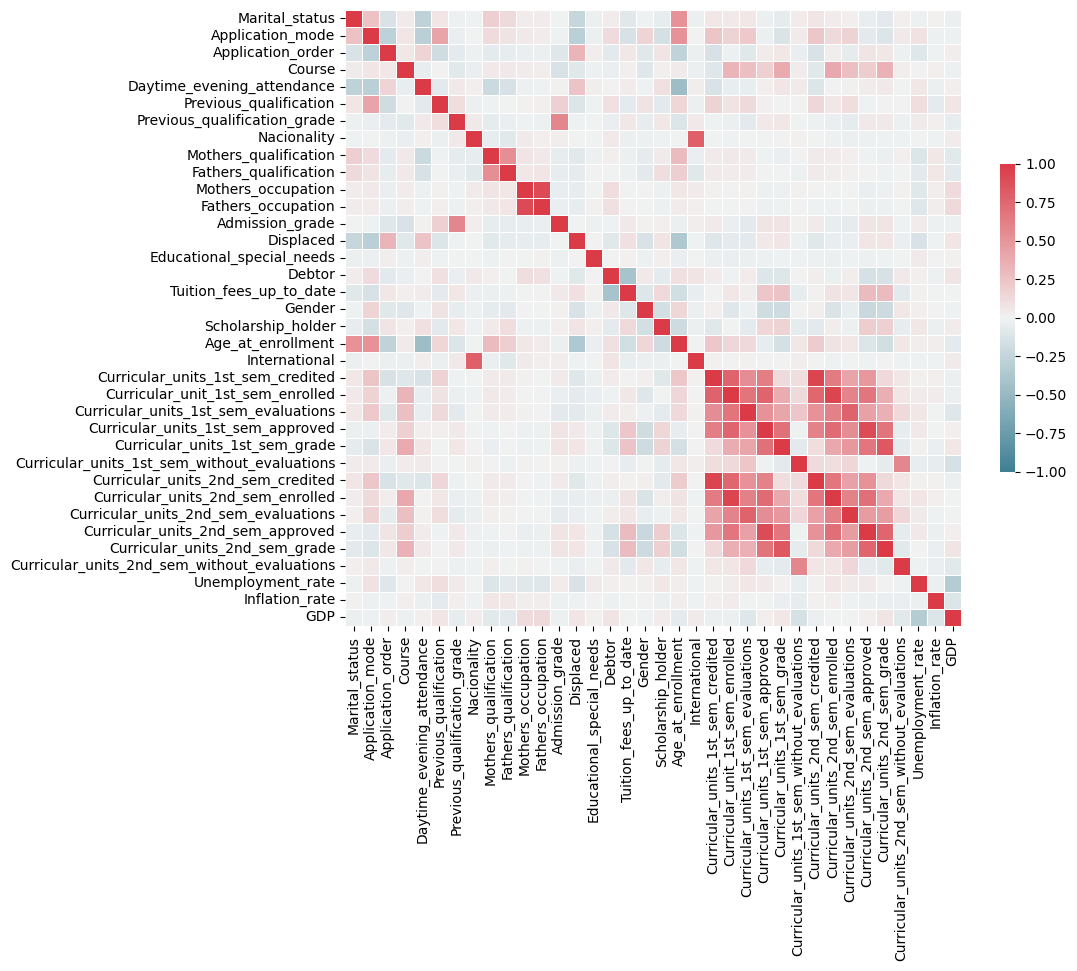

In [18]:
# 6. Advanced Correlation Heatmap

#Assert the plot
plt.figure(figsize=(10, 8))

#
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Use seaborn for heatmap for Correlation Matrix
sns.heatmap(corr_matrix_save, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Part d) Dataset Cleaning

        1. Drop any NaN Samples (If any)
        2. Drop any Outliers

### Part e) Related Work

        Please See Project Paper.

### Part f) Feature Extraction

    1. Reuse of Correlation Map
    2. SelectKBest Function
    
cite
https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

<Axes: >

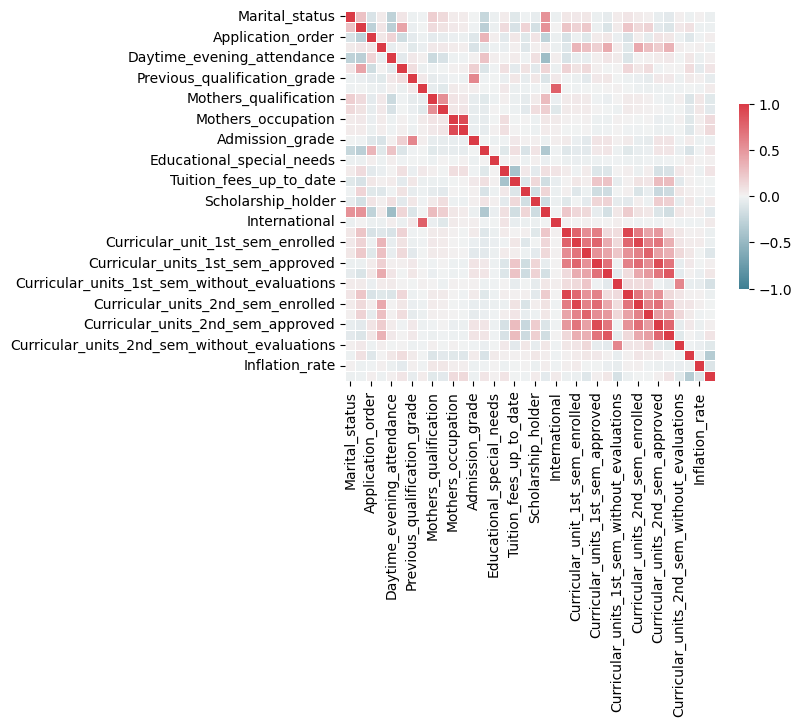

In [19]:
# 1. Reuse of Correlation Map 
sns.heatmap(corr_matrix_save, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# 2. SelectKBest Function List

#Select the amount of features
f = 36

#Apply Function
selector = SelectKBest(score_func=f_classif, k=f)

#Establish new feature set variable
X_selection =  selector.fit(features_, df_.Target2)

#Retrieve the Scores from the fit
feature_scores = X_selection.scores_
selected_features_indices = selector.get_support(indices=True)
selected_features = features_.columns[selected_features_indices]

#Create a dataframe for later use
feature_scores_list = pd.DataFrame({'Feature': features_.columns, 'Score': feature_scores})
feature_scores_list = feature_scores_list.sort_values(by='Score', ascending=False)


print('Visualization of Features weights')
feature_scores_list.head(36)


Visualization of Features weights


,Feature,Score
30,Curricular_units_2nd_sem_approved,1410.732938
31,Curricular_units_2nd_sem_grade,1134.109544
24,Curricular_units_1st_sem_approved,859.866768
25,Curricular_units_1st_sem_grade,713.517328
16,Tuition_fees_up_to_date,505.621429
18,Scholarship_holder,225.751437
19,Age_at_enrollment,154.712071
15,Debtor,137.647527
17,Gender,123.041811
1,Application_mode,114.534956


In [21]:
# 2. SelectKBest Function List Final Decision

#--------------------------------------------------------#
#Change this parameter to change the amount of features selected!
f = 25
#--------------------------------------------------------#

#Apply Function
selector = SelectKBest(score_func=f_classif, k=f)

#Establish new feature set variable
X_selection =  selector.fit(features_, df_.Target2)
selected_features_indices = selector.get_support(indices=True)
selected_features = features_.columns[selected_features_indices]

#--------------------------------------------------------#
#Assigning the new feature set to a variable "X_"
X_ = features_[selected_features]
#X_.info()
X_.shape
#--------------------------------------------------------#


(4424, 25)

### Part g) Model development

        1. Logisitc Regression (Multiple Input)
        2. LDA/QDA
        3. KNN
        4. Decision Trees

In [22]:
#1. Logistic Regression (Multiple Logistic Regression)

#Assert X / Add Constant

X_multReg = sm.add_constant(X_.values)

#Assert y
y = df_.Target2

#Logisitic Regression Classifier for Mutliclass
clf = LogisticRegression(multi_class='auto', solver='newton-cg')

# Fit the Model
clf.fit(X_multReg, y)

#Create the Predicitions based on the trained model
y_pred_multReg = clf.predict(X_multReg)


In [23]:
#1. Logisitc Regression (Multiple Input) STATS

print('----------------------------------------------------------------------------------') 
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)
print('----------------------------------------------------------------------------------') 
print("There are ... Coefficients",  len(clf.coef_))
print('----------------------------------------------------------------------------------')
accuracy_multReg = accuracy_score(y, y_pred_multReg)
print("Accuracy for Log Reg:", accuracy_multReg)
print('----------------------------------------------------------------------------------') 
print('Classification Report for Logistic Model')
print('----------------------------------------------------------------------------------')
print(classification_report(y, y_pred_multReg, target_names=['dropout', 'graduate', 'enrolled']))

----------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
classes:  [0 1 2]
coefficients:  [[ 3.00928079e-03 -1.03913273e-01  1.44411177e-04  5.86034000e-02
  -6.66342023e-03  2.96112714e-03  3.21600561e-03 -6.66016208e-03
  -3.28694700e-03  1.39512136e-01  3.69020090e-01 -1.55626444e+00
   2.07352782e-01 -2.99872748e-01  3.60434918e-02  1.31864237e-01
  -6.22616588e-04 -2.63277593e-01  4.62624848e-02 -1.13848932e-01
   1.47990712e-01  4.27427779e-01 -2.91088088e-02 -4.78628920e-01
  -7.08159659e-02 -6.17887499e-02]
 [-3.36511755e-03  4.93732073e-02 -2.39569183e-03 -1.68783134e-02
   6.81974642e-02  1.33284092e-03  3.58386079e-03  2.53417374e-03
   5.07974212e-03 -5.38723549e-02 -5.69895188e-01  1.24644466e+00
  -2.20336400e-01  4.69524165e-01 -1.40224299e-02 -2.20032208e-01
  -2.51466854e-02  4.28232724e-01 -4.98605498e-02  8.29553960e-02
  -8.79461937e-02 -4.80966091e-01 -4.43734849e-02  6.04055285e-01
   5.91601385e-02 

In [24]:
# 1. Logisitc Regression (Multiple Input) Confusion Matrix
mult_reg_CR = confusion_matrix(y, y_pred_multReg)
df_.groupby([y_pred_multReg, 'Target']).size().unstack('Target')

#Legend
#Enumerated Legend: 
    #Dropout  = 0
    #Graduate = 1
    #Enrolled = 2

Target,Dropout,Enrolled,Graduate
0,1094,183,65
1,199,340,2047
2,128,271,97


In [25]:
# 2. LDA Training Model
# Assert X
X_LDA = X_.values

#Assert y
y = df_.Target2

lda = LinearDiscriminantAnalysis(solver='svd')

y_pred_LDA = lda.fit(X_LDA, y).predict(X_LDA)


In [26]:
# 2. LDA Model STATS
print('----------------------------------------------------------------------------------') 
accuracy_LDA = accuracy_score(y, y_pred_LDA)
print("Accuracy for LDA:", accuracy_LDA)
print('----------------------------------------------------------------------------------')
print('Classification Report for LDA Model')
print('----------------------------------------------------------------------------------')
print(classification_report(y, y_pred_LDA, target_names=['dropout', 'graduate', 'enrolled']))
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------
Accuracy for LDA: 0.7615280289330922
----------------------------------------------------------------------------------
Classification Report for LDA Model
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

     dropout       0.89      0.70      0.78      1421
    graduate       0.77      0.94      0.85      2209
    enrolled       0.50      0.37      0.43       794

    accuracy                           0.76      4424
   macro avg       0.72      0.67      0.68      4424
weighted avg       0.76      0.76      0.75      4424

----------------------------------------------------------------------------------


In [27]:
#2. LDA  Model Confusion Matrix
LDA_CR = confusion_matrix(y, y_pred_LDA)
df_.groupby([y_pred_LDA, 'Target']).size().unstack('Target')

#Legend
#Enumerated Legend: 
    #Dropout  = 0
    #Graduate = 1
    #Enrolled = 2

Target,Dropout,Enrolled,Graduate
0,995,108,19
1,240,391,2079
2,186,295,111


In [28]:
#2. QDA Training Model

# Assert X
X_QDA = X_.values

#Assert y
y = df_.Target2

qda = QuadraticDiscriminantAnalysis()

y_pred_QDA = qda.fit(X_QDA, y).predict(X_QDA)

In [29]:
# 2. QDA Model STATS
print('----------------------------------------------------------------------------------') 
accuracy_QDA = accuracy_score(y, y_pred_QDA)
print("Accuracy for QDA:", accuracy_QDA)
print('----------------------------------------------------------------------------------')
print('Classification Report for QDA Model')
print('----------------------------------------------------------------------------------')
print(classification_report(y, y_pred_QDA, target_names=['dropout', 'graduate', 'enrolled']))
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------
Accuracy for QDA: 0.7400542495479204
----------------------------------------------------------------------------------
Classification Report for QDA Model
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

     dropout       0.80      0.72      0.76      1421
    graduate       0.78      0.88      0.83      2209
    enrolled       0.48      0.39      0.43       794

    accuracy                           0.74      4424
   macro avg       0.69      0.66      0.67      4424
weighted avg       0.73      0.74      0.73      4424

----------------------------------------------------------------------------------


In [30]:
# 2. QDA Model Confusion Report

In [31]:
print('----------------------------------------------------------------------------------') 
confusion_matrix(y, y_pred_QDA).T
df_.groupby([y_pred_QDA, 'Target']).size().unstack('Target')


----------------------------------------------------------------------------------


Target,Dropout,Enrolled,Graduate
0,1021,145,110
1,219,341,1945
2,181,308,154


In [32]:
# 3. KNN Model Train (K = 5)

X_KNN = X_.values

y = df_.Target2

knn = KNeighborsClassifier(n_neighbors=5)
y_pred_KNN = knn.fit(X_KNN, y).predict(X_KNN)


In [33]:
# 3. KNN Stats and Classification Report
print('----------------------------------------------------------------------------------') 
print(y_pred_KNN)
print('----------------------------------------------------------------------------------') 
accuracy_KNN = accuracy_score(y, y_pred_KNN)
print("Accuracy for KNN:", accuracy_KNN)
print('----------------------------------------------------------------------------------') 
print(classification_report(y, y_pred_KNN, target_names = ['dropout','graduate', 'enrolled'], digits = 4))

----------------------------------------------------------------------------------
[0 1 0 ... 1 1 1]
----------------------------------------------------------------------------------
Accuracy for KNN: 0.7613019891500904
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

     dropout     0.7800    0.7685    0.7742      1421
    graduate     0.7593    0.9153    0.8300      2209
    enrolled     0.7036    0.3199    0.4398       794

    accuracy                         0.7613      4424
   macro avg     0.7476    0.6679    0.6814      4424
weighted avg     0.7559    0.7613    0.7421      4424



In [34]:
# 4. Decision Trees

### Part h) Fine-Tune Models and Feature Set

    1. Ridge Classification / RidgeClassificationCV
    2. Lasso Regression / LassoCV (Deprecated)
    3. Principle Component Analysis

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassi

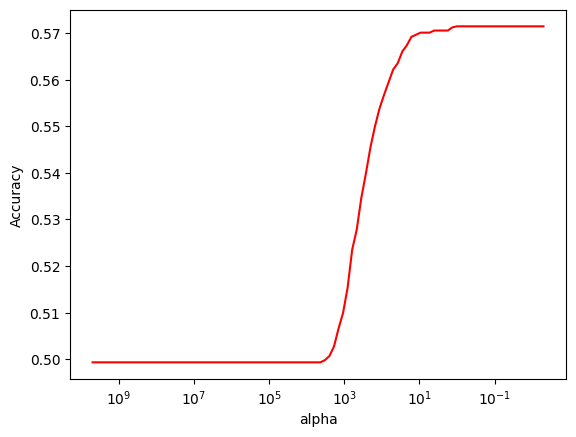

In [82]:
#1. Ridge Regression Spread

#Create a spread of alphas parameters
alphas = 10**np.linspace(10,-2,100)*0.5

#Assert X
X_Ridge = X_

#Assert y
y = df_.Target2

#Declare Ridge Class / MSE Array
ridge = RidgeClassifier()
MSE = []

#Assigns the MSE for each given alpha to be plotted for a in alphas:
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_Ridge), y)
    pred_ridge = ridge.predict(X_Ridge)
    MSE.append(accuracy_score(y, pred_ridge))

#Double check the validity of this graph
ax = plt.gca()
ax.plot(alphas, MSE, color="red")
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

In [100]:
#1. RidgeCV Optimum Alpha

# Use the ridge CV class to obtian the optimum alpha
ridgeClassCV = RidgeClassifierCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgeClassCV.fit(X_Ridge, y)

RidgeClassifierCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.4...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
                  scoring='neg_mean_squared_error')

In [101]:
#1. RidgeCV Returning the Best alpha and best score attributes
print('----------------------------------------------------------------------------------') 
print('Best Alpha:', ridgeClassCV.alpha_)
print('----------------------------------------------------------------------------------') 
print('Best Score:', ridgeClassCV.best_score_)

----------------------------------------------------------------------------------
Best Alpha: 152.69277544167062
----------------------------------------------------------------------------------
Best Score: -0.4909584086799277


In [102]:
#1. Use the RidgeCV optimum Alpha to finalize fit.
#Use RidgeCV Class
ridgeCV_ = RidgeClassifier()
ridgeCV_.set_params(alpha=ridgeClassCV.alpha_)
ridgeCV_.fit(X_Ridge, y)

# Asserting the boundaries
pred_ridgeCV_= ridgeCV_.predict(X_Ridge)

print('----------------------------------------------------------------------------------') 
accuracy_ridgeCV_ = accuracy_score(y, pred_ridgeCV_)
print("Accuracy for RidgeCV:", accuracy_ridgeCV_)

----------------------------------------------------------------------------------
Accuracy for RidgeCV: 0.7556509945750453


In [121]:
print(ridgeCV_.classes_)
ridgeCV_.coef_

[0 1 2]


array([[-2.76436807e-02,  1.01894995e-04,  1.44667019e-02,
         7.44241825e-03,  8.08716556e-04,  1.05239944e-03,
        -1.97056946e-03, -1.16301428e-03,  2.40253706e-02,
         1.25685503e-01, -3.95173715e-01,  5.49762095e-02,
        -7.91056039e-02,  9.78041893e-03,  2.80894077e-02,
         1.41974093e-03, -6.82111391e-02,  1.40417648e-02,
        -2.54788723e-02,  7.43752707e-02,  1.35101972e-01,
        -8.95816298e-03, -1.86831521e-01, -1.95250412e-02,
        -1.61722732e-02],
       [ 6.51745709e-04, -1.00005879e-03, -5.07740888e-03,
        -5.05873014e-03,  1.03698622e-03,  1.22420550e-03,
         9.26959693e-05,  2.10255967e-03, -1.84379096e-02,
        -1.31075950e-01,  1.90804262e-01, -6.14745074e-02,
         1.83151511e-01, -6.15405086e-04, -1.82659094e-02,
        -1.66358809e-02,  1.06577074e-01, -5.22102946e-03,
         2.60095846e-02, -1.06408831e-01, -9.42965185e-02,
        -3.33160796e-02,  2.28493913e-01, -1.77795473e-02,
         2.63800569e-02],
    

In [155]:
#3. Principle Components

#Asset X
X_PCA = X_

#Assert y
y = df_.Target2

pca = PCA()
X_PCA_ = pca.fit_transform(scale(X_PCA))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:,:]

(25, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.002652,0.278349,-0.239248,-0.059992,0.229412,0.119558,0.125156,-0.177233,0.204434,0.141807,...,0.214283,-0.119596,-0.042707,-0.359644,0.046568,0.032197,0.007925,-0.013325,-0.016314,0.003140
1,0.032831,0.374879,-0.112004,0.023771,-0.064819,-0.080051,-0.111129,0.000081,0.007657,-0.029358,...,-0.518640,-0.051730,-0.050563,-0.260966,0.054846,0.041024,0.034194,0.046749,-0.013174,0.005322
2,0.000294,-0.232281,0.186829,-0.187377,0.049448,0.018591,0.346603,-0.091559,0.454613,-0.136029,...,-0.066639,0.120566,0.045458,-0.003954,-0.132943,0.004601,0.008448,-0.019587,-0.013902,0.001631
3,-0.001626,-0.271611,0.290523,0.095413,-0.181202,0.054574,-0.061901,0.093670,-0.142175,-0.094685,...,-0.291900,0.022453,0.120664,0.155610,-0.126022,0.023834,-0.028242,-0.006498,-0.008077,0.006291
4,0.004076,-0.090931,-0.237409,0.603703,-0.073069,0.073064,0.150562,0.037492,0.097225,-0.028778,...,0.017042,-0.408537,-0.484847,0.161164,-0.141947,-0.040006,-0.005356,-0.013948,0.013764,-0.001075
5,0.009207,0.162028,-0.159577,-0.159291,0.288167,0.245658,0.268433,0.115733,0.051484,-0.559854,...,-0.071039,-0.003712,-0.034528,-0.139555,0.007040,0.008647,0.015804,0.007932,0.001824,-0.006293
6,-0.006309,0.061297,-0.004665,-0.042635,0.005275,0.326021,-0.092467,0.877796,0.174114,0.122810,...,-0.057725,0.013449,0.044261,-0.014248,0.001427,-0.008240,-0.000591,0.002486,0.006111,-0.000957
7,0.010666,-0.060789,-0.255876,0.611919,-0.084403,0.036641,0.130931,-0.015357,0.155042,-0.096050,...,0.031703,0.412081,0.525630,-0.104663,0.179243,0.031221,-0.028798,0.008222,-0.012136,-0.001820
8,-0.001403,-0.284770,0.198297,-0.068129,-0.003697,-0.011948,0.294813,-0.008906,0.360351,-0.147573,...,0.018848,-0.096907,-0.077236,0.078195,0.059696,-0.002739,-0.007932,-0.019114,0.008672,0.004006
9,-0.041500,0.150756,0.147171,0.022307,-0.386568,0.574665,-0.030757,-0.111971,-0.011971,-0.026728,...,0.392998,0.020367,-0.113024,0.032599,0.034869,-0.011300,-0.008724,0.005956,0.002464,0.000673


In [136]:
#3. Principle Components
print(X_PCA_.shape)
pd.DataFrame(X_PCA_).loc[:4,:4]

(4424, 25)


,0,1,2,3,4
0,-5.692336,-1.098684,0.779762,-0.706507,0.040131
1,-0.135630,-0.911539,-0.232359,2.202148,-1.977558
2,-4.160675,-0.112375,1.878757,-1.060056,-1.130235
3,0.559768,-0.891334,0.139120,-1.209259,0.550281
4,0.364273,3.094382,-2.626262,-1.598359,1.778004


In [137]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 23.03,  36.18,  43.56,  50.02,  55.51,  60.3 ,  64.85,  68.81,
        72.52,  75.86,  79.07,  82.02,  84.81,  87.36,  89.63,  91.79,
        93.5 ,  95.11,  96.44,  97.57,  98.41,  99.08,  99.59,  99.9 ,
       100.  ])

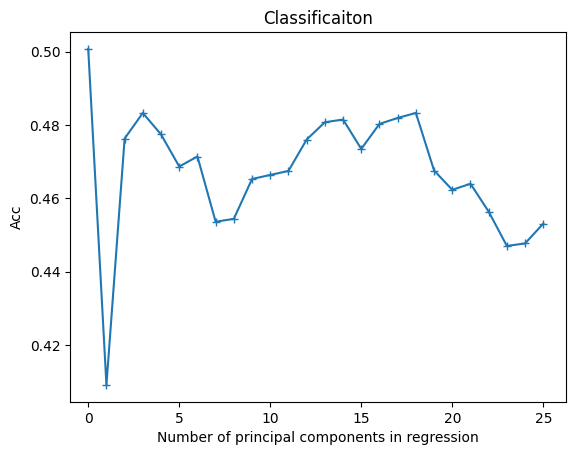

In [159]:
# 10-fold CV, with shuffle
n = len(X_PCA_)
kf_10 = KFold(n_splits=100, shuffle=True, random_state=1)

#
clf = LogisticRegression()
acc = []


# Calculate MSE with only the intercept (no principal components in regression)
score_1 = -1*cross_val_score(clf, np.ones((n,1)), y.to_numpy(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
acc.append(score_1)


# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, (f+1)):
    score = -1*cross_val_score(clf, X_PCA_[:,:i], y.to_numpy(), cv=kf_10, scoring='neg_mean_squared_error', n_jobs = -1).mean()
    acc.append(score)

INsert log reg fit. 



plt.plot(acc, '-+')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Acc')
plt.title('Classificaiton')
plt.xlim(xmin=-1);

### Part e) Performance

    1. Review of Classification Reports / and Confusion Matrices
    2. Cross Validation Methods
            a. Validation Set Approach
            b. Leave One Out CV
            c. K-Fold CV

In [161]:
# 2. Cross Validation Set

t_prop = 0.5 # Splits the data in half

#Assert X_